In [1]:
#Importing the libraries

import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path_train ="C:/python_lessons/January_Project/split_images/train/"
path_test = "C:/python_lessons/January_Project/split_images/val/"

Categories=["Round_elliptical","Cigar_elliptical","Tight_spiral"]

In [4]:
train_data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_train , categories)
        class_name = categories
        for img in random.sample(os.listdir(path),3000): #gathering 3000 images
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                train_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [5]:
random.shuffle(train_data)

In [6]:
x_train = []
y_train = []
for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)

In [7]:
df = pd.DataFrame(y_train,columns=["labels"])

In [8]:
df

,labels
0,Round_elliptical
1,Round_elliptical
2,Round_elliptical
3,Round_elliptical
4,Round_elliptical
...,...
8995,Cigar_elliptical
8996,Cigar_elliptical
8997,Cigar_elliptical
8998,Round_elliptical


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


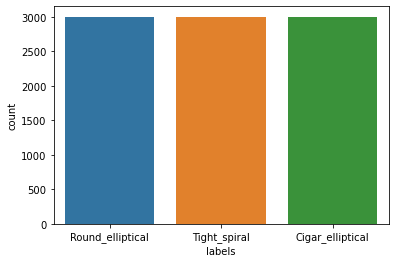

In [9]:
sns.countplot(df['labels']);

In [10]:
#Putting features into an array

x_train = np.array(x_train)

In [11]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

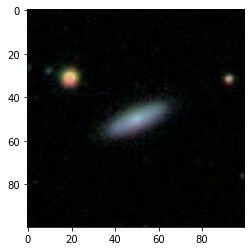

In [12]:
plt.imshow(x_train[55])

In [13]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_test , categories)
        class_name = categories
        for img in random.sample(os.listdir(path),1000):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [14]:
random.shuffle(test_data)

In [15]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [16]:
x_test = np.array(x_test)

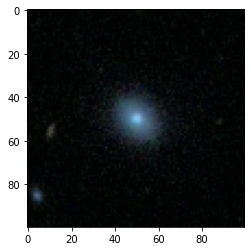

In [17]:
plt.imshow(x_test[3])

In [18]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [19]:
x_train.shape

(9000, 100, 100, 3)

In [20]:
x_test.shape

(3000, 100, 100, 3)

In [27]:
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),activation="relu",input_shape=(100,100,3)))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(128,(5,5),activation="relu"))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(212,activation="relu"))
cnn.add(Dense(4,activation="softmax"))

In [28]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [29]:
history_cnn = cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
282/282 [==============================] - 279s 985ms/step - loss: 2.5205 - accuracy: 0.4724 - val_loss: 1.0019 - val_accuracy: 0.5403
Epoch 2/10
282/282 [==============================] - 269s 954ms/step - loss: 0.9347 - accuracy: 0.5859 - val_loss: 0.9495 - val_accuracy: 0.5727
Epoch 3/10
282/282 [==============================] - 274s 972ms/step - loss: 0.8909 - accuracy: 0.6063 - val_loss: 0.9477 - val_accuracy: 0.5803
Epoch 4/10
282/282 [==============================] - 277s 983ms/step - loss: 0.8315 - accuracy: 0.6413 - val_loss: 1.0004 - val_accuracy: 0.5883
Epoch 5/10
282/282 [==============================] - 281s 998ms/step - loss: 0.7463 - accuracy: 0.6819 - val_loss: 1.0588 - val_accuracy: 0.5410
Epoch 6/10
282/282 [==============================] - 306s 1s/step - loss: 0.6407 - accuracy: 0.7278 - val_loss: 1.1541 - val_accuracy: 0.5837
Epoch 7/10
282/282 [==============================] - 295s 1s/step - loss: 0.5165 - accuracy: 0.7932 - val_loss: 1.3700 - val_a

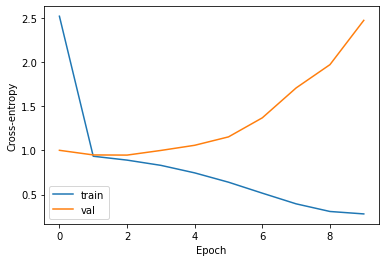

In [30]:
plt.plot(history_cnn.history["loss"])
plt.plot(history_cnn.history["val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy')
plt.legend(["train","val"]);

In [31]:
y_pred = cnn.predict(x_test)

94/94 [==============================] - 23s 239ms/step


<AxesSubplot:>

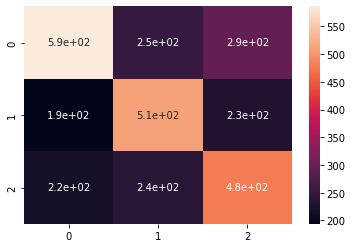

In [32]:
sns.heatmap(confusion_matrix(y_pred.argmax(axis=1),y_test),annot=True)

In [33]:
confusion_matrix(y_pred.argmax(axis=1),y_test)

array([[586, 250, 294],
       [194, 512, 228],
       [220, 238, 478]], dtype=int64)

In [34]:
accuracy_score(y_pred.argmax(axis=1),y_test)

0.5253333333333333